C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


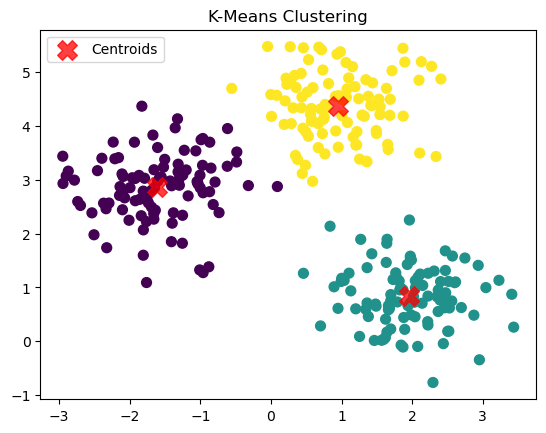

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering Accuracy: 100.00%


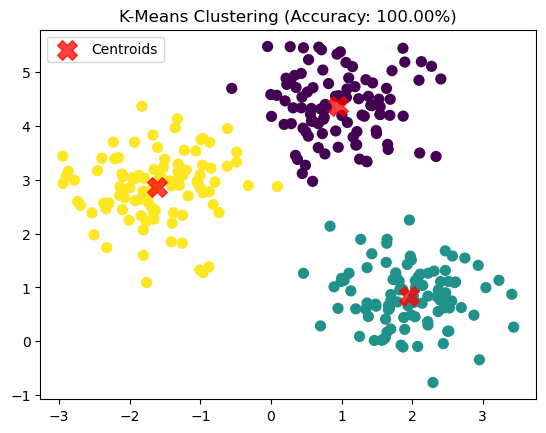

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Confusion matrix to match labels
conf_matrix = confusion_matrix(y_true, y_kmeans)

# Use Hungarian Algorithm to find best label permutation
row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # maximize accuracy

# Map predicted labels to true labels
label_mapping = dict(zip(col_ind, row_ind))
y_pred_mapped = np.array([label_mapping[label] for label in y_kmeans])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_mapped)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred_mapped, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (Accuracy: {accuracy * 100:.2f}%)")
plt.legend()
plt.show()

C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


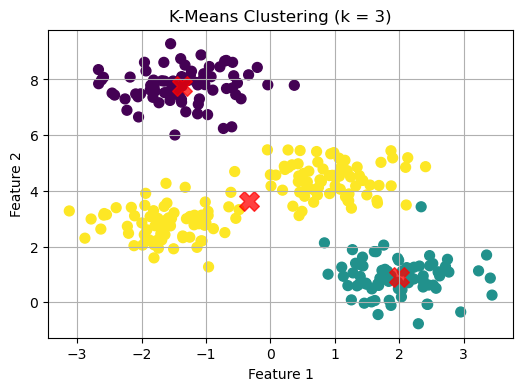

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans with K = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering (k = {k})')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


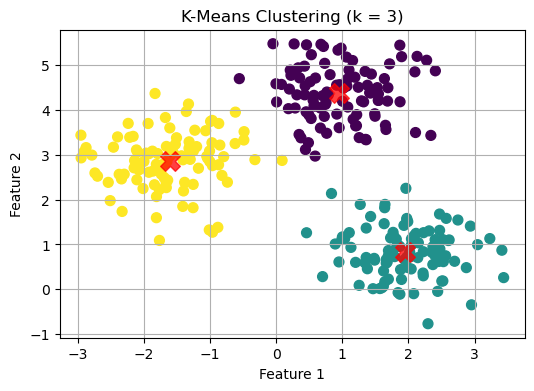

Clustering Accuracy for k = 3: 100.00%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# Generate synthetic dataset with true labels
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans with K = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering (k = {k})')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Calculate Accuracy using Hungarian Algorithm
def cluster_accuracy(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-matrix)
    accuracy = matrix[row_ind, col_ind].sum() / np.sum(matrix)
    return accuracy

acc = cluster_accuracy(y_true, y_kmeans)
print(f"Clustering Accuracy for k = {k}: {acc*100:.2f}%")


C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


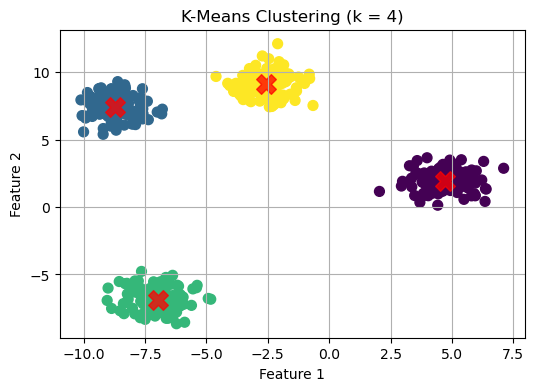

Clustering Accuracy for k = 4: 100.00%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Generate synthetic dataset with updated values
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.80, random_state=42)

# Apply KMeans with K = 4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering (k = {k})')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Function to calculate clustering accuracy
def cluster_accuracy(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-matrix)
    accuracy = matrix[row_ind, col_ind].sum() / np.sum(matrix)
    return accuracy

# Print accuracy
acc = cluster_accuracy(y_true, y_kmeans)
print(f"Clustering Accuracy for k = {k}: {acc*100:.2f}%")


C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


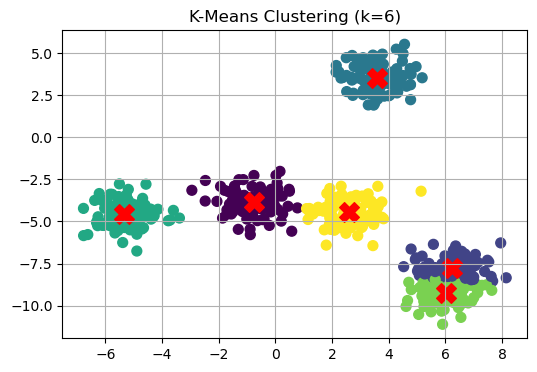

Accuracy (k=6): 93.00%


In [9]:
# Dataset 3
X3, y3 = make_blobs(n_samples=600, centers=6, cluster_std=0.70, random_state=35)
kmeans3 = KMeans(n_clusters=6, random_state=35)
y_kmeans3 = kmeans3.fit_predict(X3)

plt.figure(figsize=(6, 4))
plt.scatter(X3[:, 0], X3[:, 1], c=y_kmeans3, s=50, cmap='viridis')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering (k=6)")
plt.grid(True)
plt.show()

print(f"Accuracy (k=6): {cluster_accuracy(y3, y_kmeans3) * 100:.2f}%")


C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pruth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


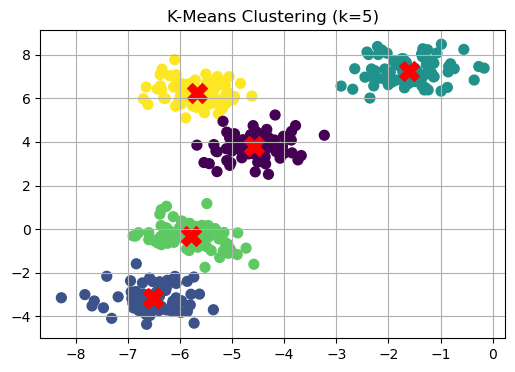

Accuracy (k=5): 100.00%


In [10]:
# Dataset 2
X2, y2 = make_blobs(n_samples=400, centers=5, cluster_std=0.50, random_state=22)
kmeans2 = KMeans(n_clusters=5, random_state=22)
y_kmeans2 = kmeans2.fit_predict(X2)

plt.figure(figsize=(6, 4))
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans2, s=50, cmap='viridis')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering (k=5)")
plt.grid(True)
plt.show()

print(f"Accuracy (k=5): {cluster_accuracy(y2, y_kmeans2) * 100:.2f}%")
